# ***Parcial BigData - Segundo Corte***

* # ***EDA***

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Configurar estilo general
plt.style.use('seaborn-v0_8-whitegrid')

class EDA:
    def __init__(self, file_path):
        self.df = pd.read_csv(file_path)

    def generate_plots(self):
        print("=== Iniciando análisis exploratorio de datos (EDA) ===")

        #Distribución de fechas
        plt.figure(figsize=(10,5))
        self.df['Date'] = pd.to_datetime(self.df['Date'], errors='coerce')
        self.df['Date'].value_counts().sort_index().plot(kind='line', marker='o')
        plt.title('Frecuencia de publicaciones por fecha')
        plt.xlabel('Fecha')
        plt.ylabel('Cantidad de registros')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

        #Longitud promedio de titulares (Top1)
        plt.figure(figsize=(8,5))
        self.df['len_top1'] = self.df['Top1'].astype(str).apply(len)
        plt.hist(self.df['len_top1'], bins=30, color='skyblue', edgecolor='black')
        plt.title('Distribución de la longitud de titulares (Top1)')
        plt.xlabel('Número de caracteres')
        plt.ylabel('Frecuencia')
        plt.tight_layout()
        plt.show()

        #Conteo de palabras más comunes en Top1
        from collections import Counter
        import re
        words = ' '.join(self.df['Top1'].astype(str)).lower()
        words = re.findall(r'\b[a-zA-Z]{3,}\b', words)
        common_words = Counter(words).most_common(10)
        words, counts = zip(*common_words)
        plt.figure(figsize=(8,5))
        plt.bar(words, counts, color='lightcoral')
        plt.title('Top 10 palabras más comunes en titulares')
        plt.xticks(rotation=45)
        plt.ylabel('Frecuencia')
        plt.tight_layout()
        plt.show()

        #Promedio de longitud por día
        plt.figure(figsize=(10,5))
        df_len = self.df.groupby('Date')['len_top1'].mean()
        df_len.plot(kind='line', color='orange', marker='s')
        plt.title('Longitud promedio de titulares por día')
        plt.xlabel('Fecha')
        plt.ylabel('Longitud promedio')
        plt.tight_layout()
        plt.show()

        #Conteo de valores nulos
        plt.figure(figsize=(8,5))
        self.df.isnull().sum().plot(kind='bar', color='mediumpurple')
        plt.title('Valores nulos por columna')
        plt.ylabel('Cantidad de nulos')
        plt.tight_layout()
        plt.show()

        print("✅ Gráficas generadas correctamente.")


* ***Main***

=== Iniciando análisis exploratorio de datos (EDA) ===


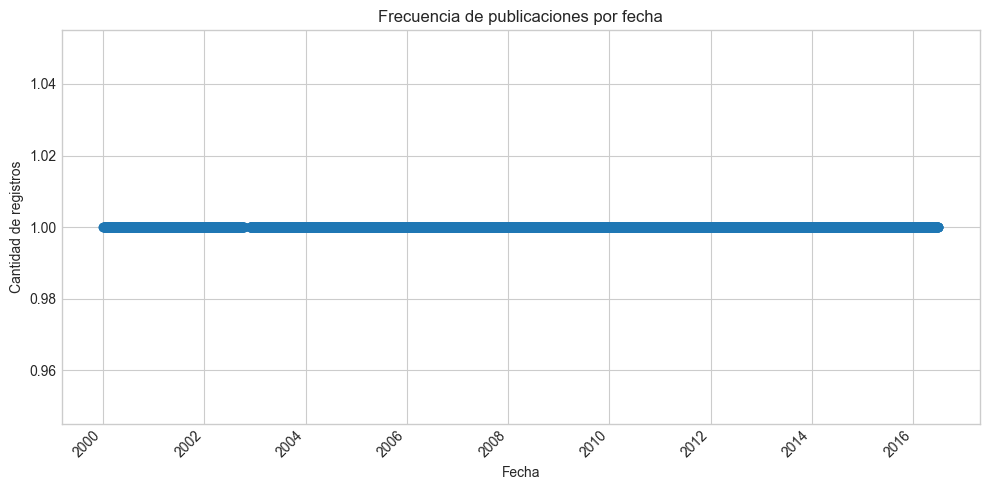

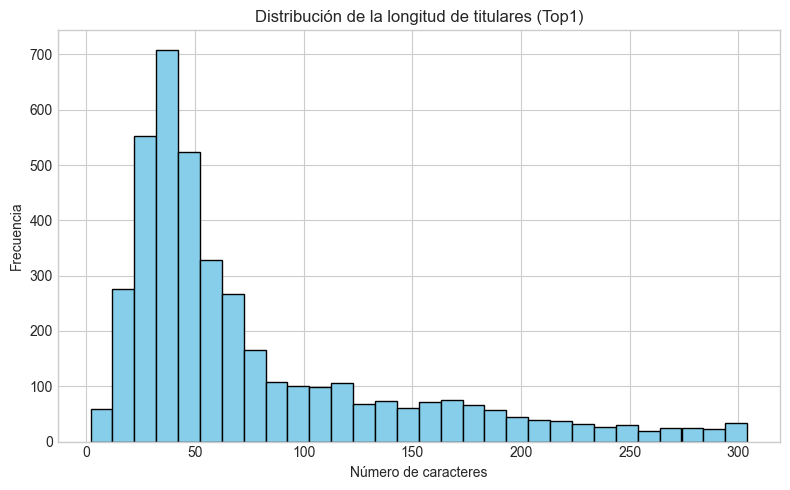

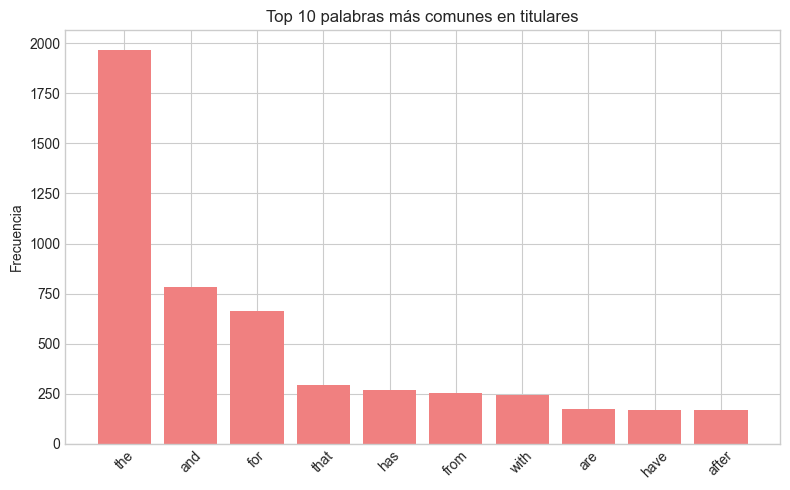

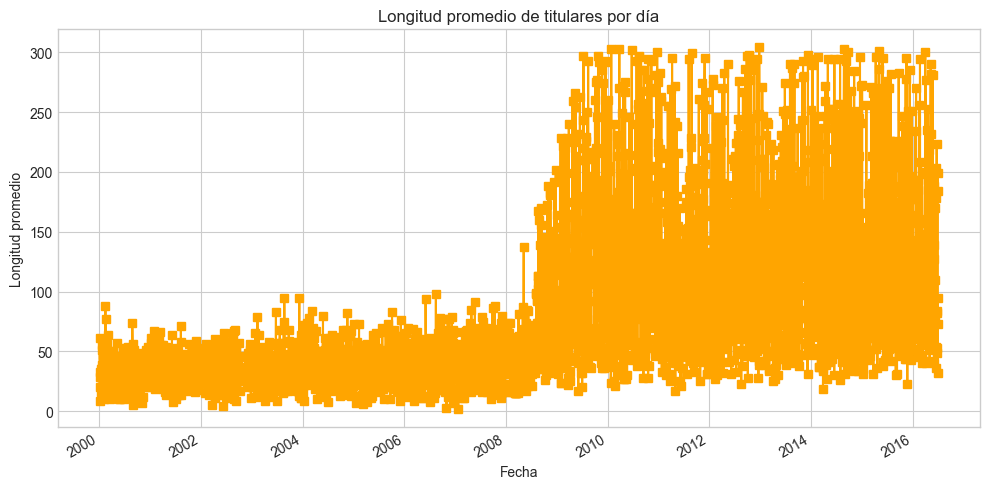

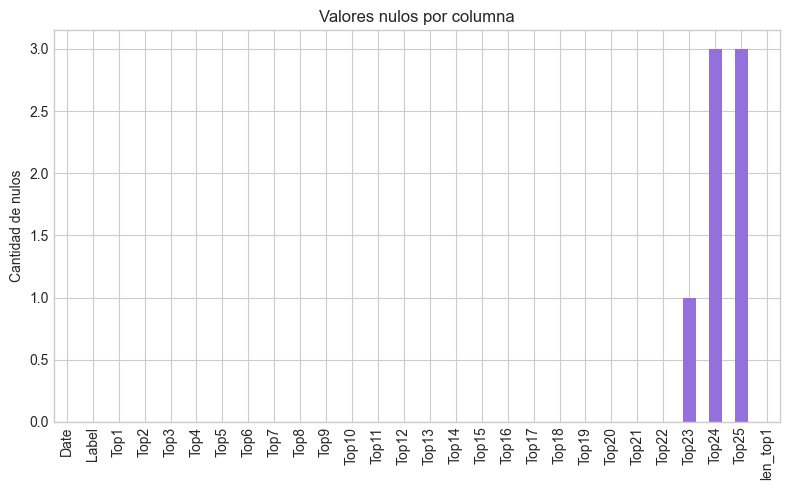

✅ Gráficas generadas correctamente.


In [2]:
if __name__ == "__main__":
    eda = EDA("stock_analysis_clean.csv")
    eda.generate_plots()